# Marketing Insights For E-Commerce Company

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
CustomersData=pd.read_excel(r"C:\Users\aazar\OneDrive\Desktop\dwhelper\ml project 5\Datasets\CustomersData.xlsx")
Discount_Coupon=pd.read_csv(r"C:\Users\aazar\OneDrive\Desktop\dwhelper\ml project 5\Datasets\Discount_Coupon.csv")
Marketing_Spend=pd.read_csv(r"C:\Users\aazar\OneDrive\Desktop\dwhelper\ml project 5\Datasets\Marketing_Spend.csv")
Online_Sales=pd.read_csv(r"C:\Users\aazar\OneDrive\Desktop\dwhelper\ml project 5\Datasets\Online_Sales.csv")
Tax_amount=pd.read_excel(r"C:\Users\aazar\OneDrive\Desktop\dwhelper\ml project 5\Datasets\Tax_amount.xlsx")

## Data cleaning and preprocessing

In [3]:
Marketing_Spend["Date"] = pd.to_datetime(Marketing_Spend["Date"], format="%m/%d/%Y").astype("object")

In [4]:
Marketing_Spend["Date"] = pd.to_datetime(Marketing_Spend["Date"], format="%Y%m%d").astype("object")

In [5]:
data1=pd.merge(CustomersData,Online_Sales,on="CustomerID",how="inner")
data2=pd.merge(data1,Tax_amount,left_on="Product_Category",right_on="Product_Category",how="inner")
data3=pd.merge(data2, Discount_Coupon, left_on='Product_Category',right_on="Product_Category ",how="inner")
data3["Transaction_Date"]=pd.to_datetime(data3["Transaction_Date"],format="%Y%m%d").astype("object")
final_data=pd.merge(data3,Marketing_Spend,left_on="Transaction_Date",right_on="Date",how="inner")

In [6]:
final_data.drop(columns=["Date","Product_Category ","Month"],axis=1,inplace=True)

In [7]:
final_data["Transaction_Date"]=pd.to_datetime(final_data["Transaction_Date"],format="%Y%m%d")

In [8]:
final_data.columns=final_data.columns.str.lower()

In [9]:
final_data["month"]=final_data["transaction_date"].dt.month

In [10]:
final_data.isna().sum()

customerid             0
gender                 0
location               0
tenure_months          0
transaction_id         0
transaction_date       0
product_sku            0
product_description    0
product_category       0
quantity               0
avg_price              0
delivery_charges       0
coupon_status          0
gst                    0
coupon_code            0
discount_pct           0
offline_spend          0
online_spend           0
month                  0
dtype: int64

In [11]:
final_data.duplicated().sum()

472716

In [12]:
final_data = final_data.drop_duplicates().reset_index()

In [13]:
final_data.drop(columns=("index"),axis=1,inplace=True)

In [14]:
final_data.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,coupon_code,discount_pct,offline_spend,online_spend,month
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,ELEC10,10,4500,2424.5,1
1,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,ELEC20,20,4500,2424.5,1
2,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,ELEC30,30,4500,2424.5,1
3,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,ELEC10,10,4500,2424.5,1
4,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,ELEC20,20,4500,2424.5,1


## 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level                                                                        Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [15]:
final_data['invoice_value']=((final_data["quantity"]*final_data["avg_price"])*(1-final_data["discount_pct"])
                            *(1+final_data["gst"]))+final_data["delivery_charges"]

In [16]:
final_data["invoice_value"]=final_data['invoice_value'].abs()
final_data["invoice_value"]

0          1515.229
1          3206.039
2          4896.849
3          1515.229
4          3206.039
            ...    
157567    11903.650
157568    18172.150
157569     7903.150
157570    16691.650
157571    25480.150
Name: invoice_value, Length: 157572, dtype: float64

# 2. Perform Detailed exploratory analysis


## 2.1 Understanding how many customers acquired every month


In [17]:
final_data['year_month']=final_data["transaction_date"].dt.to_period("M")

In [18]:
cust_acquired=final_data.groupby(final_data["year_month"]).agg(customers=("customerid","nunique")).reset_index()
cust_acquired

,year_month,customers
0,2019-01,215
1,2019-02,109
2,2019-03,208
3,2019-04,224
4,2019-05,200
5,2019-06,259
6,2019-07,235
7,2019-08,300
8,2019-09,193
9,2019-10,210


## 2.2  Understand the retention of customers on month on month basis
 

In [19]:
pivot_table_M_M=final_data.pivot_table(index="customerid",columns="year_month",values="transaction_date",aggfunc="min")
retention=pivot_table_M_M.apply(lambda x: x > x.shift(), axis=1)
retention_rate=retention.mean().reset_index(name="retention_rate")
retention_rate["year_month"]=retention_rate['year_month'].astype("str")
retention_rate

,year_month,retention_rate
0,2019-01,0.000000
1,2019-02,0.008856
2,2019-03,0.007493
3,2019-04,0.016349
4,2019-05,0.017030
5,2019-06,0.025204
6,2019-07,0.039510
7,2019-08,0.043597
8,2019-09,0.029973
9,2019-10,0.019755


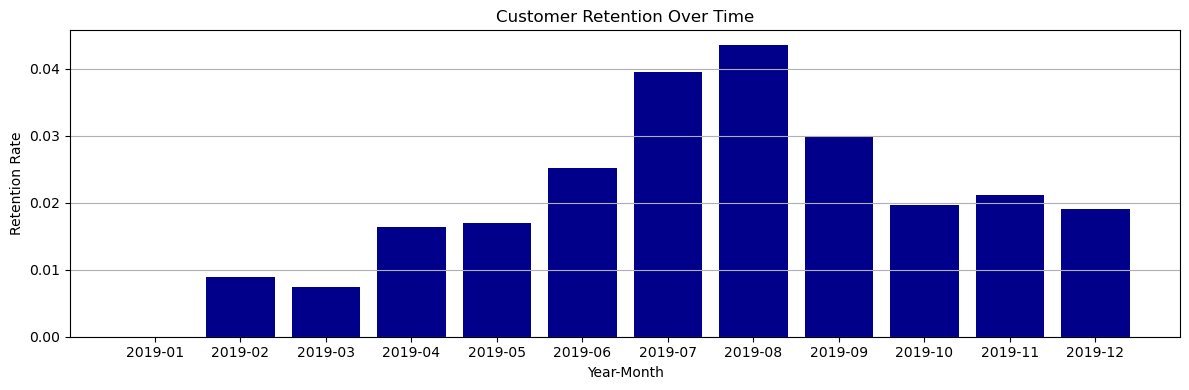

In [20]:
plt.figure(figsize=(12,4))
plt.bar(retention_rate["year_month"], retention_rate["retention_rate"],color="darkblue")
plt.title('Customer Retention Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 2.3 How the revenues from existing/new customers on month on month basis

In [21]:
final_data.columns

Index(['customerid', 'gender', 'location', 'tenure_months', 'transaction_id',
       'transaction_date', 'product_sku', 'product_description',
       'product_category', 'quantity', 'avg_price', 'delivery_charges',
       'coupon_status', 'gst', 'coupon_code', 'discount_pct', 'offline_spend',
       'online_spend', 'month', 'invoice_value', 'year_month'],
      dtype='object')

## another method
first_purchase=final_data.groupby("customerid")["transaction_date"].transform("min")
final_data["new_customer"]=final_data['transaction_date']==first_purchase
new_cust=final_data.pivot_table(values="total",index="month_on_month",columns="new_customer",aggfunc="sum").round(0)
new_cust.columns=["existing_revenue","new_cust_revenue"]
result=final_data.groupby("month_on_month").agg(total=('total',"sum"),total_cust=("customerid","nunique")).round(0)
new_cust.join(result).reset_index()

In [22]:
existing_cust=final_data[final_data["transaction_date"]<final_data["transaction_date"].max()-pd.DateOffset(months=1)]["customerid"].unique()
new_cust=final_data[final_data["transaction_date"]>=final_data["transaction_date"].max()-pd.DateOffset(months=1)]["customerid"].unique()

In [23]:
monthly_revenue = final_data.groupby('year_month')['invoice_value'].sum().round(2)
monthly_revenue.index = monthly_revenue.index.astype(str)
monthly_revenue

year_month
2019-01    25267887.45
2019-02    19515440.27
2019-03    21941411.82
2019-04    25276824.99
2019-05    19321673.89
2019-06    20251766.74
2019-07    23402461.95
2019-08    25119950.44
2019-09    22620525.76
2019-10    25410615.40
2019-11    31480914.02
2019-12    32592260.12
Name: invoice_value, dtype: float64

In [24]:
existing_customer_revenue=final_data[final_data["customerid"].isin(existing_cust)].groupby("year_month")["invoice_value"].sum().round(2)
existing_customer_revenue.index = existing_customer_revenue.index.astype(str)

new_customer_revenue=final_data[final_data["customerid"].isin(new_cust)].groupby("year_month")["invoice_value"].sum().round(2)
new_customer_revenue.index = new_customer_revenue.index.astype(str)


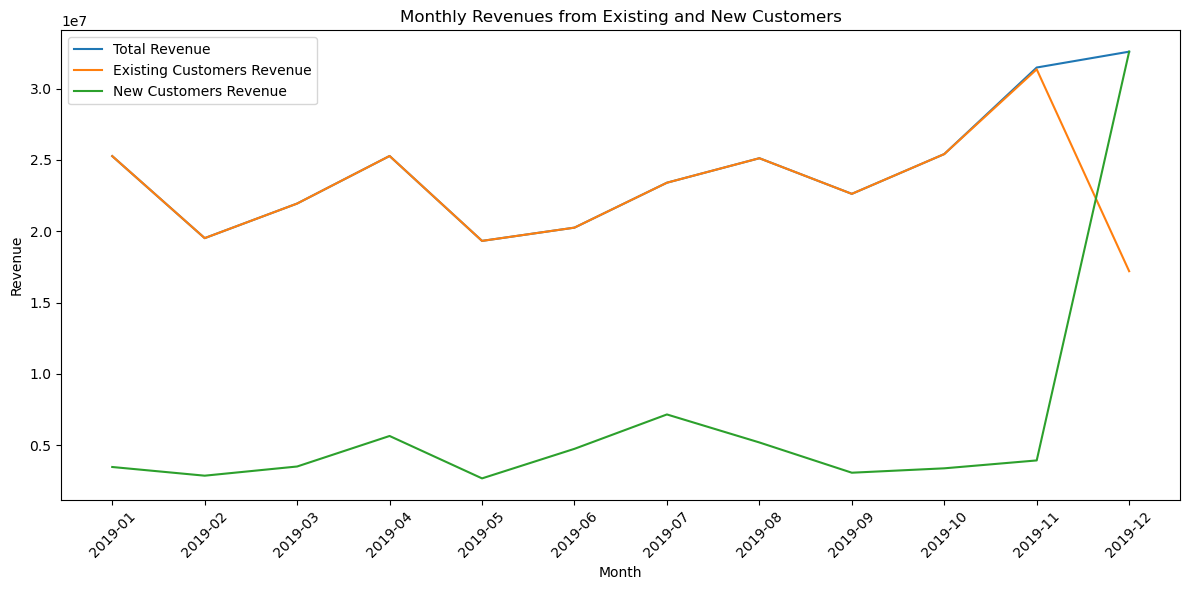

In [25]:
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index,monthly_revenue,label='Total Revenue')
plt.plot(existing_customer_revenue.index,existing_customer_revenue, label='Existing Customers Revenue')
plt.plot(new_customer_revenue.index,new_customer_revenue,label='New Customers Revenue')

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenues from Existing and New Customers')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 2.4 How the discounts playing role in the revenues?

In [26]:
monthly_summary=final_data.groupby("year_month").agg(tot_revenue=("invoice_value","sum"),tot_discount=("discount_pct",
                                                                                        lambda x : (x*final_data["discount_pct"]/100).sum())).round(2)

In [27]:
monthly_summary["net_revenue"]=monthly_summary["tot_revenue"]-monthly_summary["tot_discount"]

In [28]:
monthly_summary.index=monthly_summary.index.astype(str)
monthly_summary

,tot_revenue,tot_discount,net_revenue
year_month,,,
2019-01,25267887.45,56322.0,25211565.45
2019-02,19515440.27,45430.0,19470010.27
2019-03,21941411.82,60060.0,21881351.82
2019-04,25276824.99,57372.0,25219452.99
2019-05,19321673.89,63224.0,19258449.89
2019-06,20251766.74,58226.0,20193540.74
2019-07,23402461.95,72744.0,23329717.95
2019-08,25119950.44,85568.0,25034382.44
2019-09,22620525.76,59822.0,22560703.76


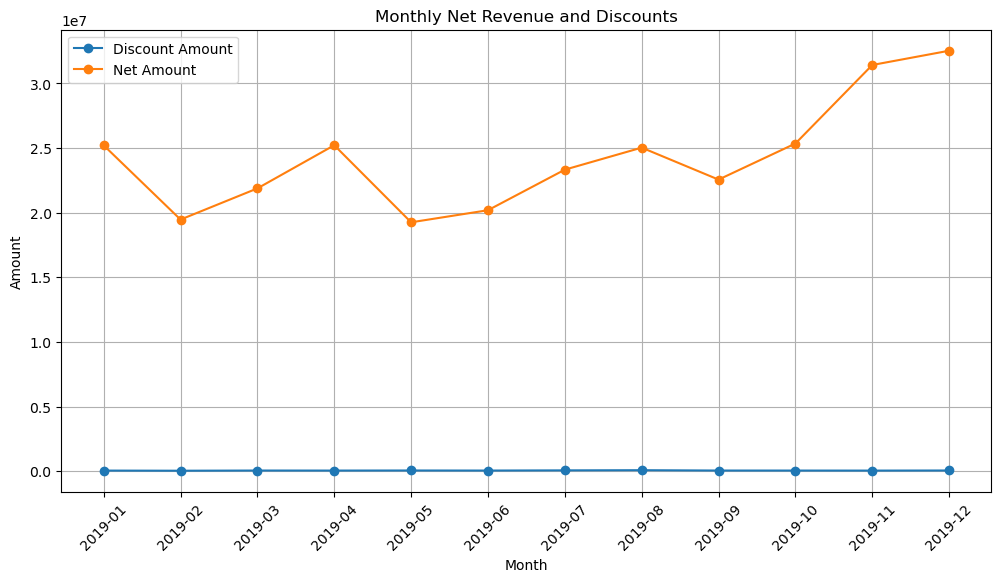

In [29]:
plt.figure(figsize=(12,6))
plt.plot(monthly_summary.index,monthly_summary["tot_discount"],label='Discount Amount', marker='o')
plt.plot(monthly_summary.index,monthly_summary["net_revenue"],label='Net Amount', marker='o')
plt.legend()
plt.title('Monthly Net Revenue and Discounts')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## 2.5 Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [30]:
latest_transaction_date = final_data['transaction_date'].max()
existing_customers = final_data[final_data['transaction_date'] < latest_transaction_date]
new_customers = final_data[final_data['transaction_date'] >= latest_transaction_date]

In [31]:
existing_customers_count=existing_customers["customerid"].nunique()
new_customers_count=new_customers["customerid"].nunique()

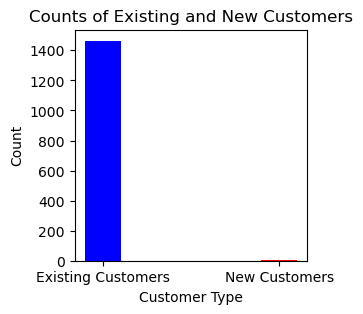

In [32]:
categories = ['Existing Customers', 'New Customers']
counts = [existing_customers_count, new_customers_count]
plt.figure(figsize=(3, 3))
plt.bar(categories, counts, color=['blue', 'red'],width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Counts of Existing and New Customers')
plt.show()

In [33]:
category_monthly_summary = final_data.groupby(['product_category', 'year_month']).agg(
    total_revenue=('invoice_value', 'sum'),
    total_orders=('transaction_id', 'nunique'),
    avg_order_value=('invoice_value', 'mean'),
    total_customers=('customerid', 'nunique'),
    total_quantity=('quantity', 'sum')
).reset_index()
category_monthly_summary

,product_category,year_month,total_revenue,total_orders,avg_order_value,total_customers,total_quantity
0,Accessories,2019-01,3213.9390,1,1071.313000,1,3
1,Accessories,2019-03,3741.8730,1,1247.291000,1,3
2,Accessories,2019-04,10393.3920,3,866.116000,3,12
3,Accessories,2019-05,8699.9880,6,483.332667,6,18
4,Accessories,2019-06,12856.7010,6,612.223857,6,21
...,...,...,...,...,...,...,...
168,Waze,2019-08,36382.1832,53,195.603135,41,264
169,Waze,2019-09,18475.0534,29,166.441923,26,147
170,Waze,2019-10,30596.3064,35,237.180670,30,270
171,Waze,2019-11,68482.6584,53,368.186335,44,408


<Figure size 1200x600 with 0 Axes>

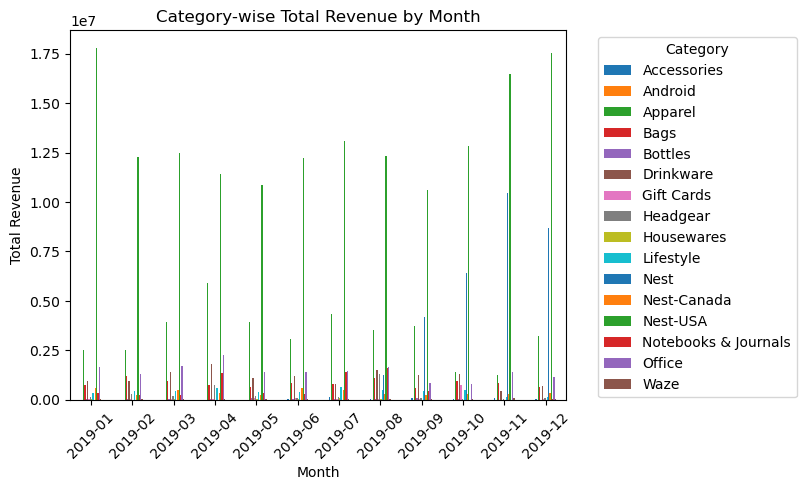

<Figure size 1200x600 with 0 Axes>

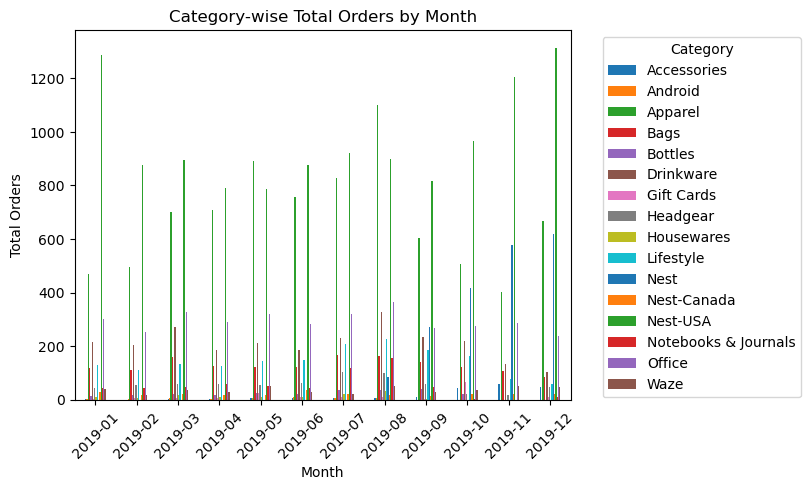

<Figure size 1200x600 with 0 Axes>

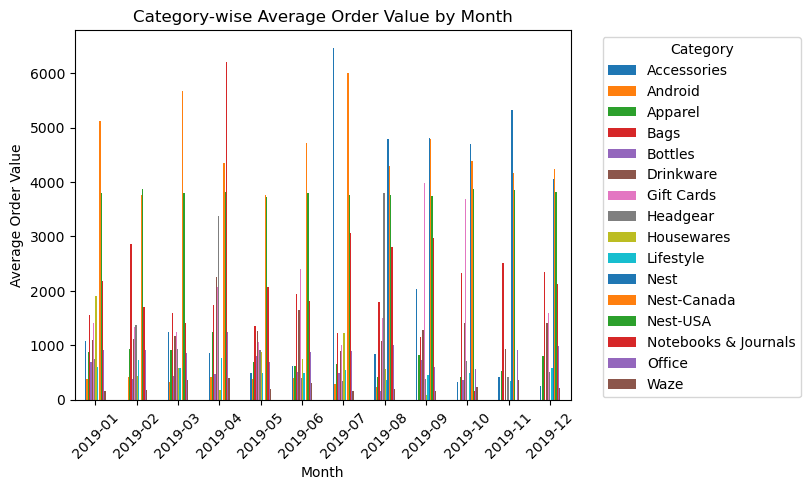

<Figure size 1200x600 with 0 Axes>

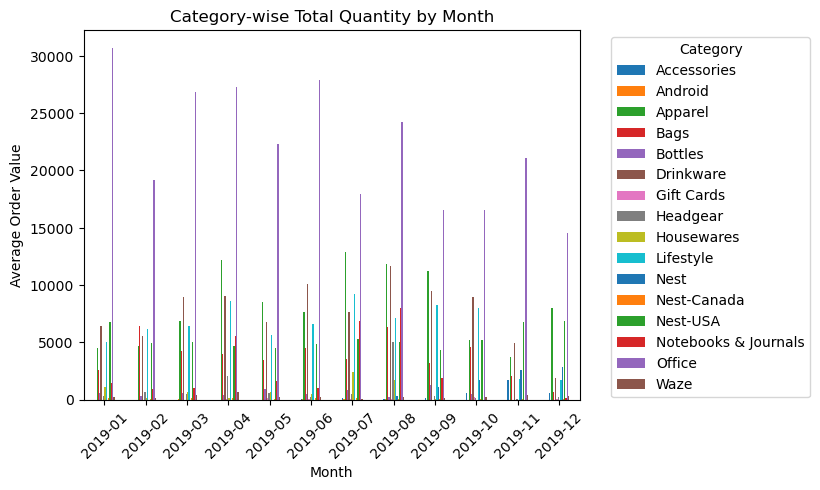

In [34]:
# Visualize Total Revenue
plt.figure(figsize=(12, 6))
category_monthly_summary.pivot(index='year_month', columns='product_category', values='total_revenue').plot(kind='bar', stacked=False)

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Category-wise Total Revenue by Month')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Orders
plt.figure(figsize=(12, 6))
category_monthly_summary.pivot(index='year_month', columns='product_category', values='total_orders').plot(kind='bar', stacked=False)

plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Category-wise Total Orders by Month')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Visualize Average Order Value
plt.figure(figsize=(12, 6))
category_monthly_summary.pivot(index='year_month', columns='product_category', values='avg_order_value').plot(kind='bar', stacked=False)

plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.title('Category-wise Average Order Value by Month')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Quantity
plt.figure(figsize=(12, 6))
category_monthly_summary.pivot(index='year_month', columns='product_category', values='total_quantity').plot(kind='bar', stacked=False)

plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.title('Category-wise Total Quantity by Month')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [35]:
final_data["week"] = final_data["transaction_date"].dt.isocalendar().week
final_data["day"]=final_data["transaction_date"].dt.day
final_data.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,...,gst,coupon_code,discount_pct,offline_spend,online_spend,month,invoice_value,year_month,week,day
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,ELEC10,10,4500,2424.5,1,1515.229,2019-01,1,1
1,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,ELEC20,20,4500,2424.5,1,3206.039,2019-01,1,1
2,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,ELEC30,30,4500,2424.5,1,4896.849,2019-01,1,1
3,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,ELEC10,10,4500,2424.5,1,1515.229,2019-01,1,1
4,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,ELEC20,20,4500,2424.5,1,3206.039,2019-01,1,1


In [36]:
category_week_summary = final_data.groupby(['product_category', 'week']).agg(
    total_revenue=('invoice_value', 'sum'),
    total_orders=('transaction_id', 'nunique'),
    avg_order_value=('invoice_value', 'mean'),
    total_customers=('customerid', 'nunique'),
    total_quantity=('quantity', 'sum')
).reset_index()
category_week_summary

,product_category,week,total_revenue,total_orders,avg_order_value,total_customers,total_quantity
0,Accessories,1,364.4700,1,121.490000,1,6
1,Accessories,5,3213.9390,1,1071.313000,1,3
2,Accessories,10,3741.8730,1,1247.291000,1,3
3,Accessories,14,6856.7460,1,1142.791000,1,6
4,Accessories,16,1047.2730,1,349.091000,1,3
...,...,...,...,...,...,...,...
695,Waze,48,22986.5736,9,638.515933,8,102
696,Waze,49,8372.4990,12,186.055533,11,57
697,Waze,50,18975.1656,15,253.002208,12,147
698,Waze,51,11016.2544,15,193.267621,15,93


<Figure size 900x400 with 0 Axes>

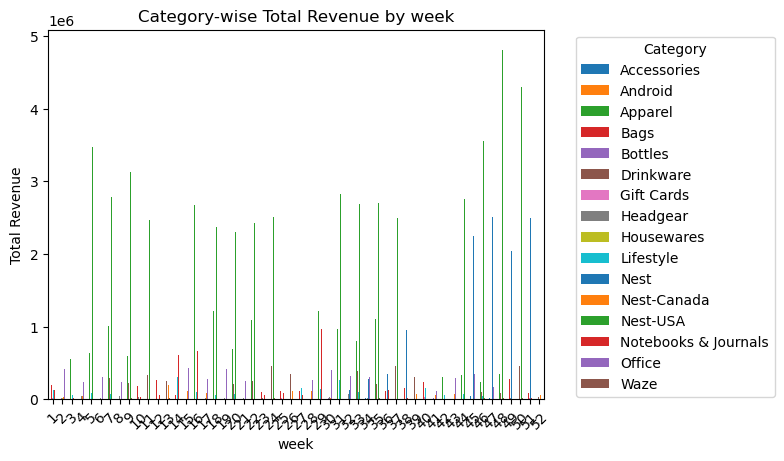

<Figure size 1200x600 with 0 Axes>

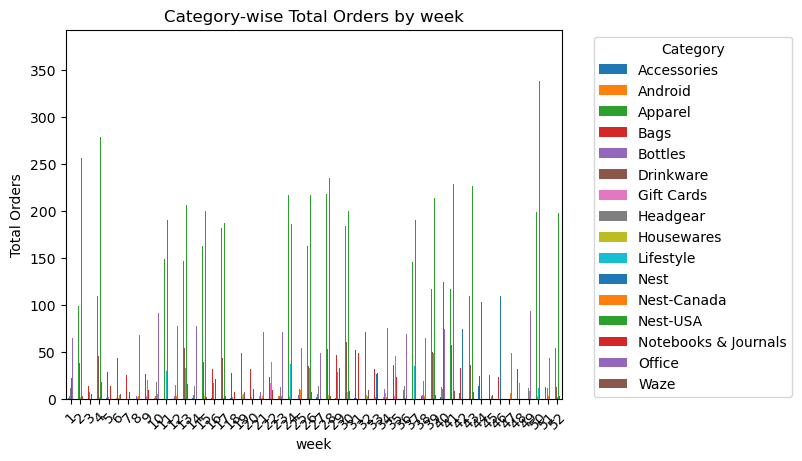

<Figure size 1200x600 with 0 Axes>

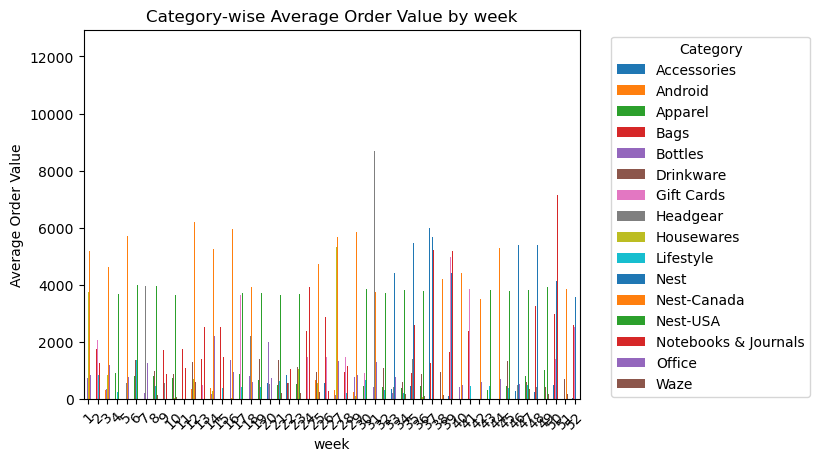

<Figure size 1200x600 with 0 Axes>

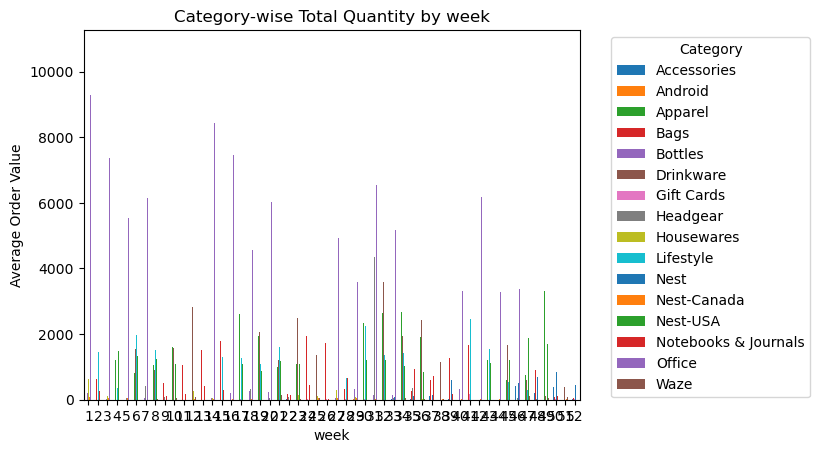

In [37]:

# Visualize Total Revenue
plt.figure(figsize=(9, 4))
category_week_summary.pivot(index='week', columns='product_category', values='total_revenue').plot(kind='bar', stacked=False)

plt.xlabel('week')
plt.ylabel('Total Revenue')
plt.title('Category-wise Total Revenue by week')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Orders
plt.figure(figsize=(12, 6))
category_week_summary.pivot(index='week', columns='product_category', values='total_orders').plot(kind='bar', stacked=False)

plt.xlabel('week')
plt.ylabel('Total Orders')
plt.title('Category-wise Total Orders by week')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Visualize Average Order Value
plt.figure(figsize=(12, 6))
category_week_summary.pivot(index='week', columns='product_category', values='avg_order_value').plot(kind='bar', stacked=False)

plt.xlabel('week')
plt.ylabel('Average Order Value')
plt.title('Category-wise Average Order Value by week')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Quantity
plt.figure(figsize=(12, 6))
category_week_summary.pivot(index='week', columns='product_category', values='total_quantity').plot(kind='bar', stacked=False)

plt.xlabel('week')
plt.ylabel('Average Order Value')
plt.title('Category-wise Total Quantity by week')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [38]:
category_day_summary = final_data.groupby(['product_category', 'day']).agg(
    total_revenue=('invoice_value', 'sum'),
    total_orders=('transaction_id', 'nunique'),
    avg_order_value=('invoice_value', 'mean'),
    total_customers=('customerid', 'nunique'),
    total_quantity=('quantity', 'sum')
).reset_index()
category_day_summary

,product_category,day,total_revenue,total_orders,avg_order_value,total_customers,total_quantity
0,Accessories,1,11506.1280,6,547.910857,6,24
1,Accessories,2,3622.8150,5,241.521000,5,15
2,Accessories,3,1273.5990,4,60.647571,5,24
3,Accessories,4,6403.5390,6,266.814125,6,54
4,Accessories,5,115739.9820,6,5511.427714,5,147
...,...,...,...,...,...,...,...
479,Waze,27,7347.7716,12,153.078575,10,69
480,Waze,28,32145.4834,20,428.606445,17,177
481,Waze,29,22358.2110,17,414.040944,13,153
482,Waze,30,9978.4704,14,158.388419,15,96


<Figure size 900x400 with 0 Axes>

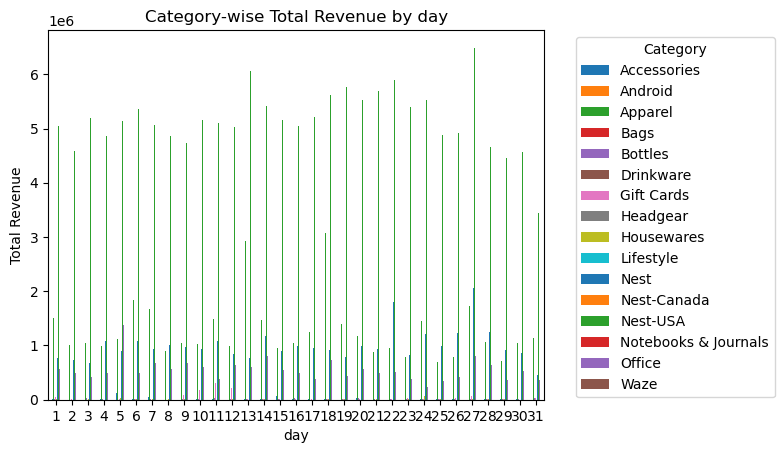

<Figure size 1200x600 with 0 Axes>

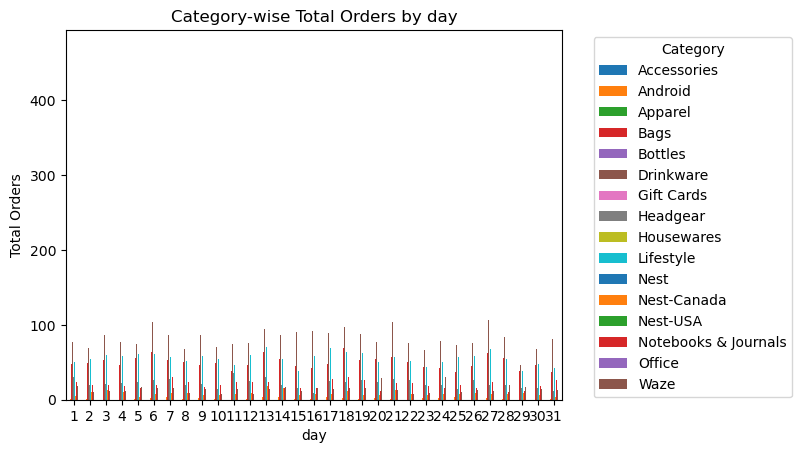

<Figure size 1200x600 with 0 Axes>

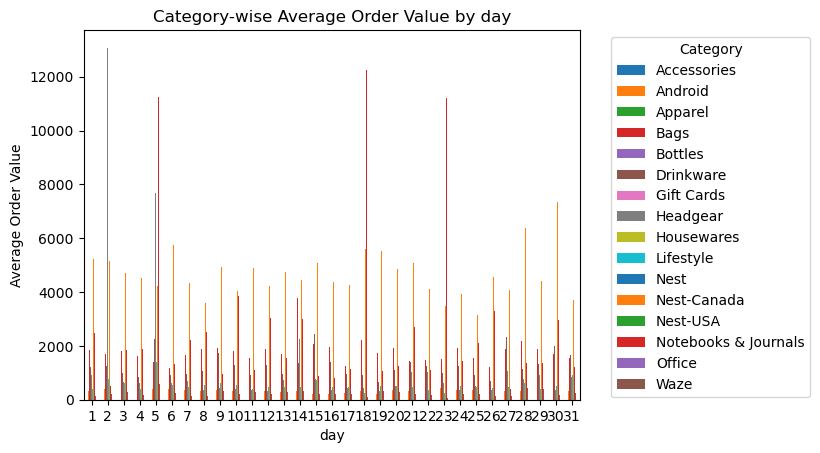

<Figure size 1200x600 with 0 Axes>

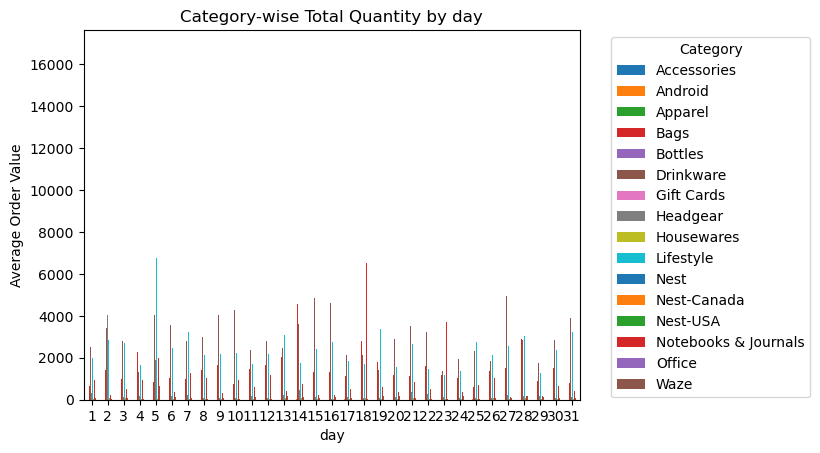

In [39]:
# Visualize Total Revenue
plt.figure(figsize=(9, 4))
category_day_summary.pivot(index='day', columns='product_category', values='total_revenue').plot(kind='bar', stacked=False)

plt.xlabel('day')
plt.ylabel('Total Revenue')
plt.title('Category-wise Total Revenue by day')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Visualize Total Orders
plt.figure(figsize=(12, 6))
category_day_summary.pivot(index='day', columns='product_category', values='total_orders').plot(kind='bar', stacked=False)

plt.xlabel('day')
plt.ylabel('Total Orders')
plt.title('Category-wise Total Orders by day')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Visualize Average Order Value
plt.figure(figsize=(12, 6))
category_day_summary.pivot(index='day', columns='product_category', values='avg_order_value').plot(kind='bar', stacked=False)

plt.xlabel('day')
plt.ylabel('Average Order Value')
plt.title('Category-wise Average Order Value by day')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Visualize Total Quantity
plt.figure(figsize=(12, 6))
category_day_summary.pivot(index='day', columns='product_category', values='total_quantity').plot(kind='bar', stacked=False)

plt.xlabel('day')
plt.ylabel('Average Order Value')
plt.title('Category-wise Total Quantity by day')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

## 2.6 Understand the trends/seasonality of sales by category, location, month etc…

In [40]:
final_data["year_month"]=final_data['year_month'].astype(str)

In [41]:
sale_by_cat=final_data.groupby(["year_month","product_category"])["invoice_value"].sum().round(2)
sale_by_loc=final_data.groupby(["year_month","location"])["invoice_value"].sum().round(2)
sale_by_month=final_data.groupby(["year_month"])["invoice_value"].sum().round(2)

In [42]:
sale_by_category=sale_by_cat.unstack()
sale_by_location=sale_by_loc.unstack()
sale_by_category

product_category,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
year_month,,,,,,,,,,,,,,,,
2019-01,3213.94,4576.85,2529525.95,724452.47,33679.95,968699.18,16978.85,121013.84,57393.22,361472.83,NaN,600112.17,17797886.50,353550.13,1667376.12,27955.46
2019-02,NaN,1233.87,2515535.90,1196275.53,21734.32,948044.90,23940.00,271722.17,6661.91,438707.79,NaN,248188.35,12278786.79,261223.94,1290142.68,13242.11
2019-03,3741.87,6889.94,3921169.41,933958.58,30862.23,1405679.53,22443.75,184521.36,29444.40,431281.64,NaN,476667.00,12496565.55,242452.85,1702389.25,53344.45
2019-04,10393.39,2467.75,5886620.49,760509.22,28498.29,1811241.42,43391.25,727710.36,5280.21,582472.45,NaN,351732.00,11402732.43,1358370.55,2264014.90,41390.29
2019-05,8699.99,5675.26,3911943.47,664990.22,63202.21,1094514.69,79301.25,179315.78,31445.28,379755.68,NaN,236803.05,10860337.86,353158.91,1418376.88,34153.36
2019-06,12856.70,10616.13,3046708.63,861251.09,33107.74,1177219.91,71820.00,76686.66,22365.78,401746.23,NaN,579312.75,12229534.17,289015.90,1406743.74,32781.31
2019-07,116420.56,7123.56,4341887.73,796666.03,59606.74,796628.94,29925.00,119564.58,80656.64,621596.13,NaN,485806.08,13079871.42,1379648.28,1475042.14,12018.11
2019-08,20028.73,4898.15,3511786.40,1087030.57,18731.90,1488435.45,44887.50,1277239.10,55818.69,475751.74,1236915.84,309738.60,12301144.53,1611136.45,1640024.61,36382.18
2019-09,79034.66,NaN,3702784.48,616813.88,90116.99,1234356.68,35910.00,67556.30,820.32,462514.39,4198615.38,215860.80,10578816.54,454073.65,864776.65,18475.05


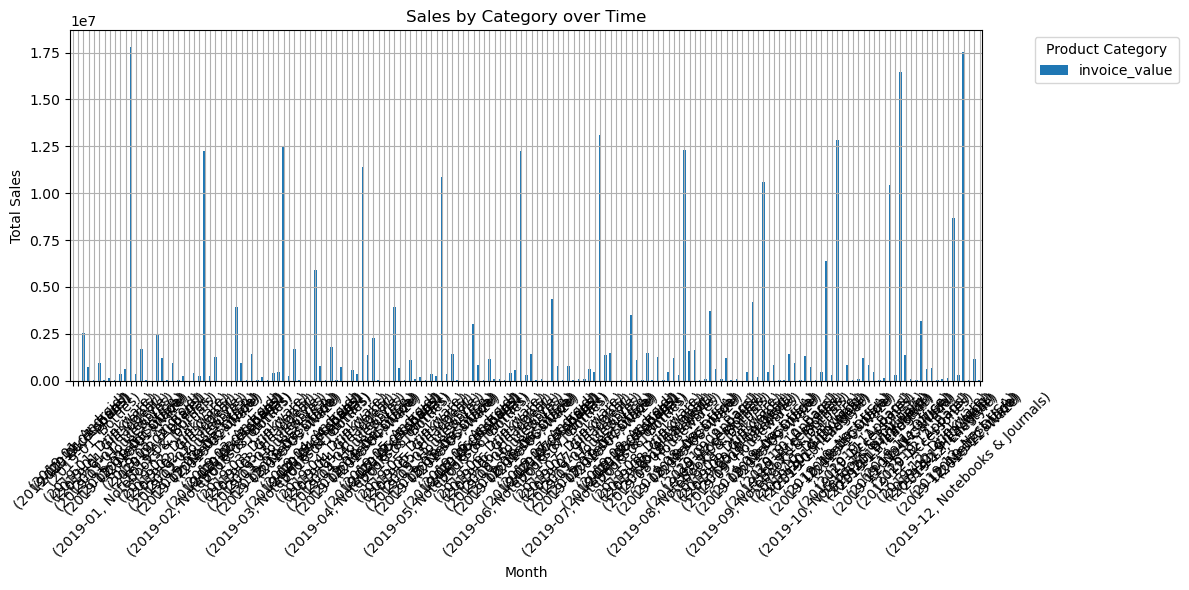

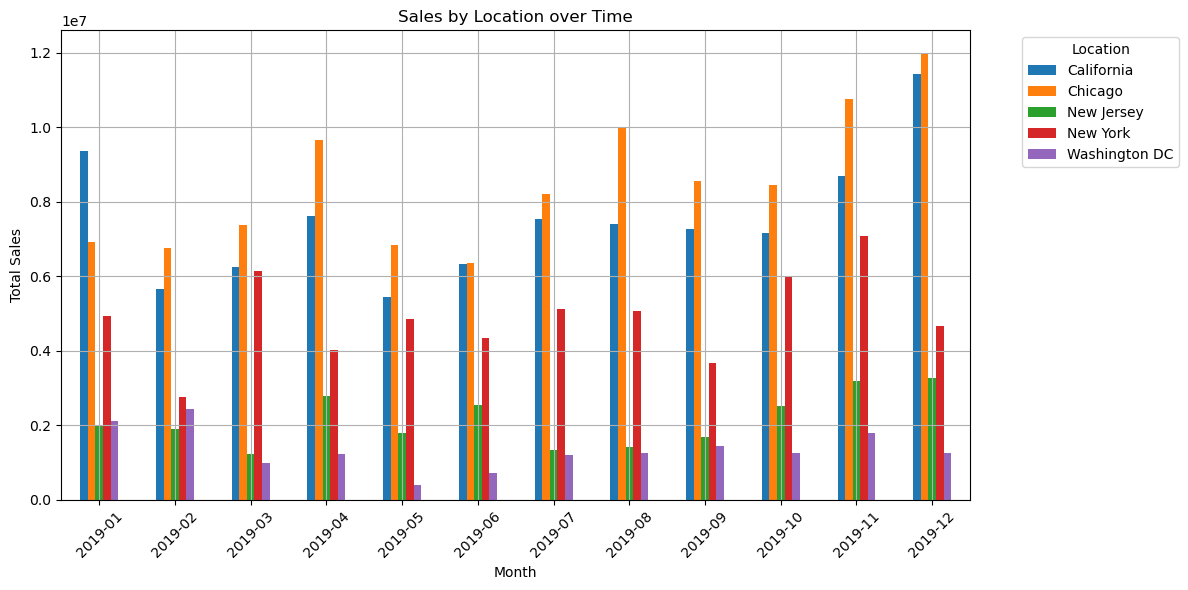

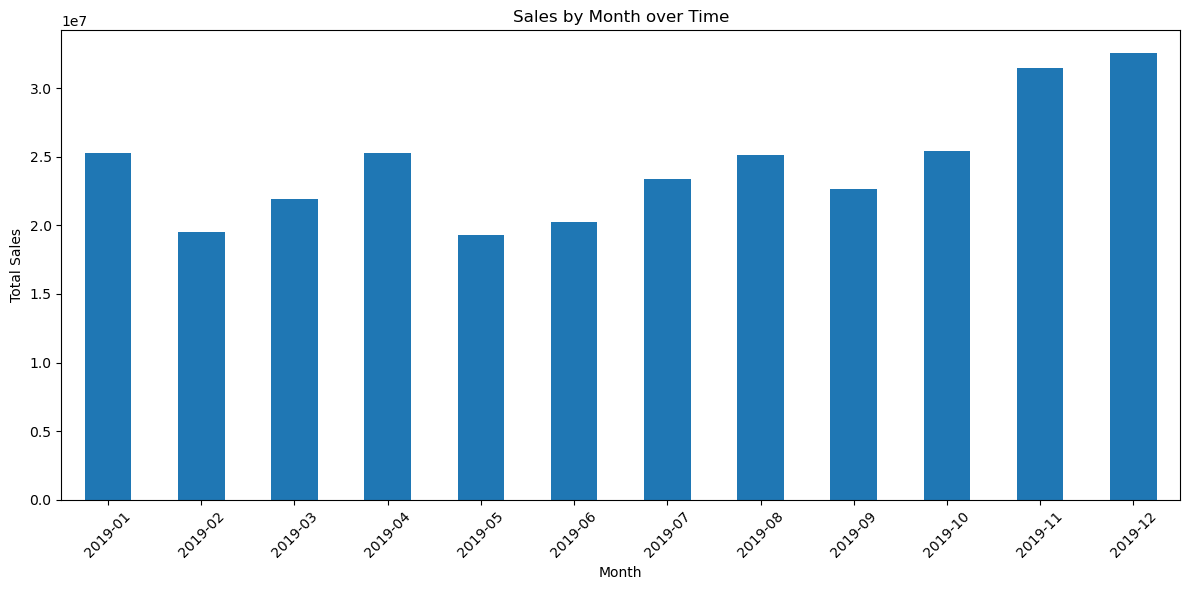

In [43]:
# Product Category
sale_by_cat.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Category over Time')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Location
sale_by_location.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Location over Time')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sales by Month over Time
sale_by_month.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.7 How number order varies and sales with different days?

In [44]:
final_data["dayofweek"]=final_data["transaction_date"].dt.day_name()

In [45]:
day_wise=final_data.groupby(final_data["dayofweek"]).agg(tot_orders=("transaction_id","count"),tot_sales=("invoice_value","sum")).round(2)

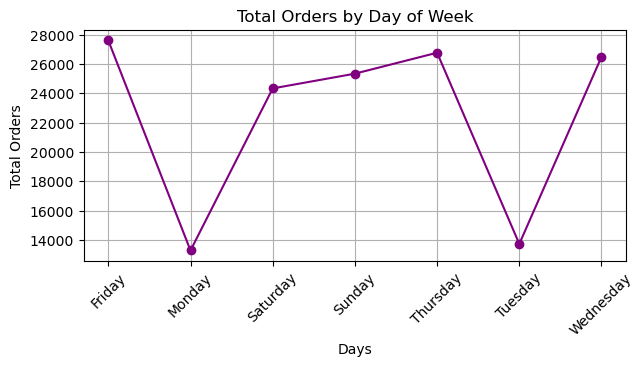

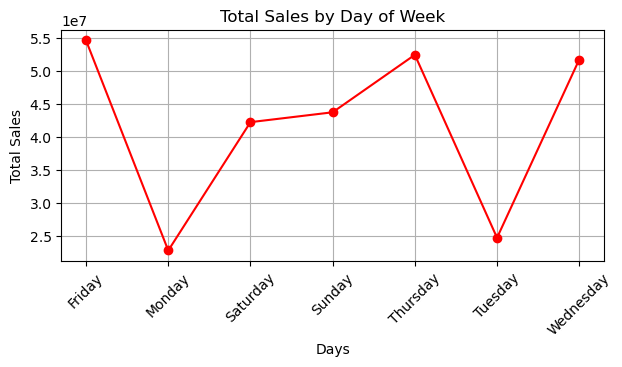

In [46]:
# Total Orders by Day of Week
plt.figure(figsize=(7,3))
plt.plot(day_wise.index, day_wise['tot_orders'], marker='o',color="purple")
plt.xlabel('Days')
plt.ylabel('Total Orders')
plt.title('Total Orders by Day of Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Total Sales by Day of Week
plt.figure(figsize=(7,3))
plt.plot(day_wise.index, day_wise['tot_sales'], marker='o',color="red")
plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day of Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 2.8 Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [47]:
monthly_summary=final_data.groupby("year_month").agg(tot_revenue=("invoice_value","sum"),
                                    online_spend=("online_spend","sum"),
                                    offline_spend=("offline_spend","sum"),
                                    delivery_charges=("delivery_charges","sum")).round(2)

monthly_summary["percentage_of_offline_spend"]=(monthly_summary["offline_spend"]/monthly_summary["tot_revenue"])*100
monthly_summary["percentage_of_online_spend"]=(monthly_summary["online_spend"]/monthly_summary["tot_revenue"])*100
monthly_summary["percentage_of_delivery_charges"]=(monthly_summary["delivery_charges"]/monthly_summary["tot_revenue"])*100
monthly_summary

,tot_revenue,online_spend,offline_spend,delivery_charges,percentage_of_offline_spend,percentage_of_online_spend,percentage_of_delivery_charges
year_month,,,,,,,
2019-01,25267887.45,22834806.87,36725100,175205.25,145.342978,90.370859,0.693391
2019-02,19515440.27,18875598.27,28119900,145362.84,144.090523,96.721355,0.744861
2019-03,21941411.82,20642902.44,31086000,177972.87,141.677301,94.081924,0.811128
2019-04,25276824.99,24292692.51,39855000,122789.34,157.674075,96.106582,0.485778
2019-05,19321673.89,22440145.62,29485500,122237.97,152.603238,116.139760,0.632647
2019-06,20251766.74,22123759.35,33295500,111167.52,164.407878,109.243601,0.548928
2019-07,23402461.95,26910407.25,34315500,144072.39,146.632009,114.989642,0.615629
2019-08,25119950.44,34426777.41,50223000,181785.00,199.932719,137.049544,0.723668
2019-09,22620525.76,22032364.59,35532000,122286.18,157.078577,97.399878,0.540598


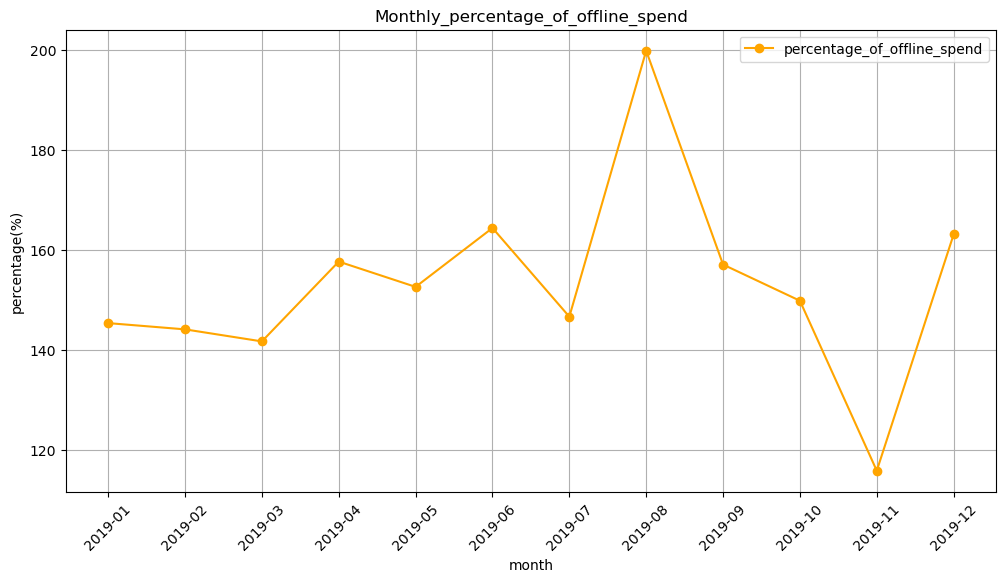

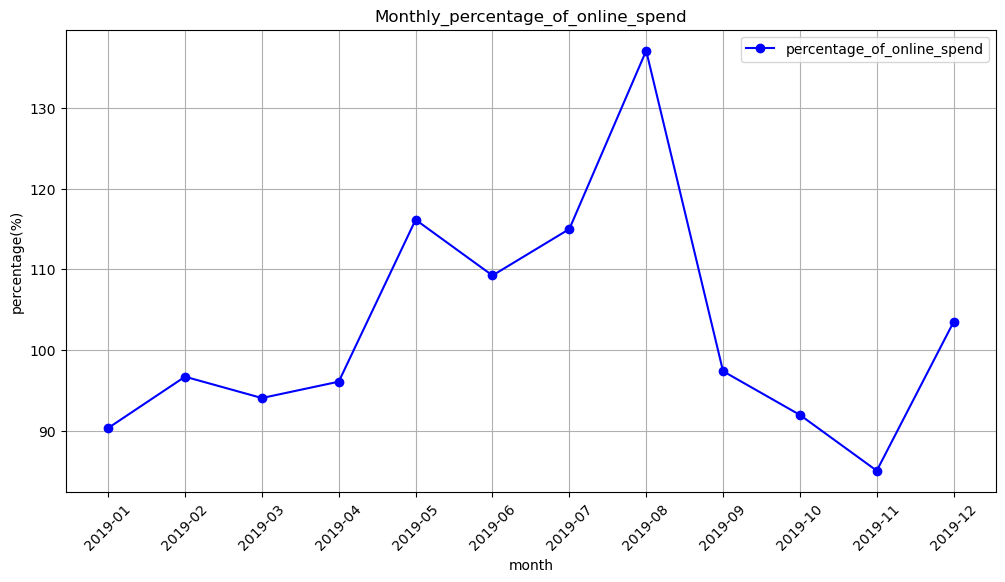

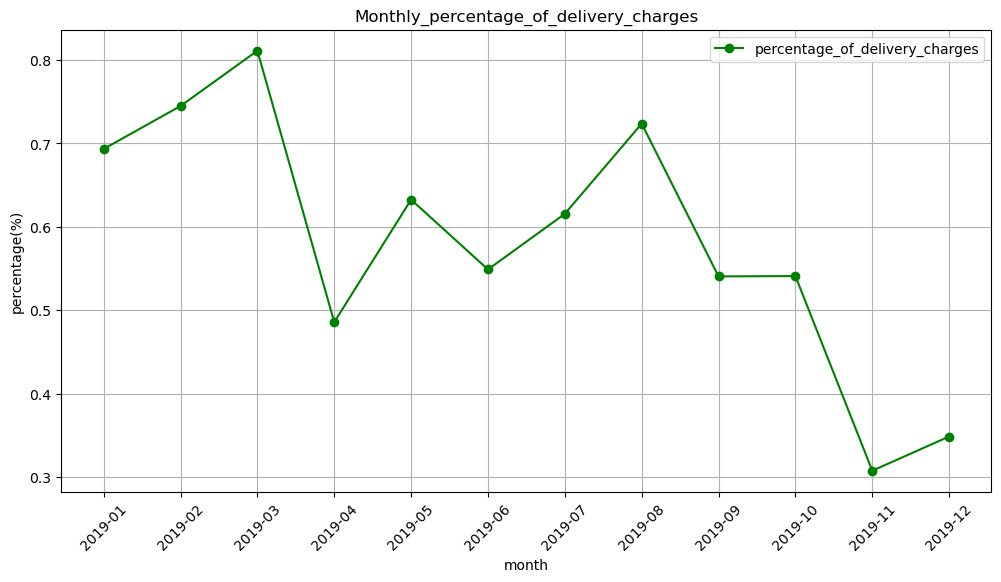

In [48]:
# Monthly_percentage_of_offline_spend
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary.index,monthly_summary["percentage_of_offline_spend"],marker="o",color="orange",linestyle="-",
        label="percentage_of_offline_spend")
plt.title("Monthly_percentage_of_offline_spend")
plt.xlabel("month")
plt.ylabel("percentage(%)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Monthly_percentage_of_online_spend
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary.index,monthly_summary["percentage_of_online_spend"],marker="o",color="blue",linestyle="-",
        label="percentage_of_online_spend")
plt.title("Monthly_percentage_of_online_spend")
plt.xlabel("month")
plt.ylabel("percentage(%)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Monthly_percentage_of_delivery_charges
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary.index,monthly_summary["percentage_of_delivery_charges"],marker="o",color="green",
        linestyle="-",label="percentage_of_delivery_charges")
plt.title("Monthly_percentage_of_delivery_charges")
plt.xlabel("month")
plt.ylabel("percentage(%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## 2.9 How marketing spend is impacting on revenue?

In [49]:
online_correlation = monthly_summary['online_spend'].corr(monthly_summary['tot_revenue'])
offline_correlation = monthly_summary['offline_spend'].corr(monthly_summary['tot_revenue'])

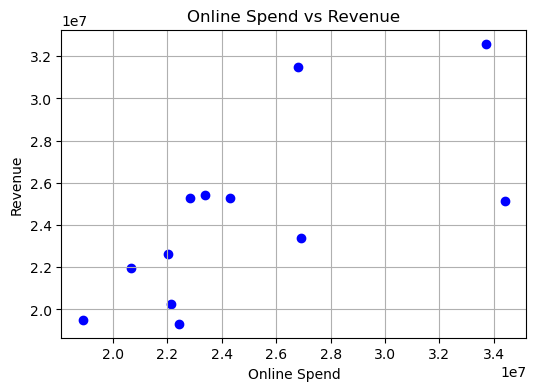

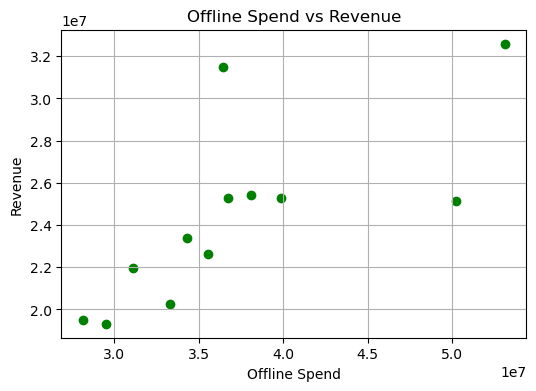

In [50]:
plt.figure(figsize=(6, 4))
plt.scatter(monthly_summary['online_spend'], monthly_summary['tot_revenue'], color='blue')
plt.title('Online Spend vs Revenue')
plt.xlabel('Online Spend')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(monthly_summary['offline_spend'], monthly_summary['tot_revenue'], color='green')
plt.title('Offline Spend vs Revenue')
plt.xlabel('Offline Spend')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

## 2.10 Which product was appeared in the transactions?

In [51]:
product=final_data['product_sku'].unique()
for i in product:
    print(i)

GGOENEBJ079499
GGOENEBQ078999
GGOENEBQ079099
GGOENEBB078899
GGOENEBQ079199
GGOEGFKQ020399
GGOEGGOA017399
GGOEGOFH020299
GGOEGOXQ016399
GGOEGOAQ012899
GGOEGOAR021999
GGOEGOBG023599
GGOEGOLC013299
GGOEAFKQ020599
GGOEYFKQ020699
GGOEGKAA019299
GGOEGAAB010516
GGOEGAAJ073414
GGOEGAPB058615
GGOEGAAB010517
GGOEYAFB073115
GGOEGAAJ073415
GGOEYAAB031816
GGOEGAAR010714
GGOEGAEQ027913
GGOEGATB060415
GGOEGAAJ080615
GGOEGAAL010615
GGOEGAEB027814
GGOEGAEC029114
GGOEGAER029714
GGOEGAFJ036214
GGOEGAYC068324
GGOEGAYH068425
GGOEGAPB058214
GGOEGBJL013999
GGOEGBMJ013399
GGOEGBJC019999
GGOEGBJR018199
GGOEGDHC018299
GGOEGDHG014499
GGOEGDWC020199
GGOEADHB014799
GGOEADWQ015699
GGOEGDWR015799
GGOEGDHC015299
GGOEGDHC074099
GGOEGPJR018999
GGOEGFQB013799
GGOEGFSR022099
GGOEGPJC019099
GGOEWEBB082699
GGOEGHPA002910
GGOEGHPA003010
GGOEYOCR078099
GGOENEBB079299
GGOEGOCB017499
GGOEGFKQ020799
GGOEYOLR018699
GGOEGOCT019199
GGOEAFKQ020499
GGOEGOAR021899
GGOEGOAA017199
GGOEAAAJ032416
GGOEAAAJ034516
GGOEGAAJ059116
GGOEGAAQ03

## 2.11 Which product was purchased mostly based on the quantity?

In [52]:
top_prod=final_data.groupby("product_sku")["quantity"].sum().reset_index()
top_prod=top_prod.nlargest(1,columns="quantity")
print("Product with the highest quantity sold:")
print(top_prod)

Product with the highest quantity sold:
        product_sku  quantity
906  GGOEGGOA017399     48702


## 3. Performing Customer Segmentation

### 3.1 Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same. 

In [53]:
current_date=max(final_data["transaction_date"])
rfm=final_data.groupby("customerid").agg(recency=("transaction_date",lambda x:(current_date-x.max())),
                                        frequency=("transaction_id","count"),monetary=("invoice_value","sum"))
rfm["recency"]=rfm["recency"].dt.days

quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])

def r_score(x):
    if x <= quantiles['recency'][0.25]:
        return 4
    elif x <= quantiles['recency'][0.50]:
        return 3
    elif x <= quantiles['recency'][0.75]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.50]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4
    
rfm['R'] = rfm['recency'].apply(r_score)
rfm['F'] = rfm['frequency'].apply(fm_score, args=('frequency',))
rfm['M'] = rfm['monetary'].apply(fm_score, args=('monetary',))

rfm['RFM_Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

segment_mapping = {
    '444': 'Premium',
    '311': 'Gold',
    '144': 'Silver',
    '111': 'Standard'
}

rfm["Segment"]=rfm["RFM_Segment"].map(segment_mapping)
rfm

,recency,frequency,monetary,R,F,M,RFM_Segment,Segment
customerid,,,,,,,,
12346,107,6,1584.2274,3,1,1,311,Gold
12347,59,177,903080.8530,3,4,4,344,NaN
12348,73,69,93214.6356,3,3,2,332,NaN
12350,17,51,85591.4094,4,2,2,422,NaN
12356,107,108,88958.6286,3,3,2,332,NaN
...,...,...,...,...,...,...,...,...
18259,270,18,31948.3380,1,1,1,111,Standard
18260,87,117,145502.6262,3,3,3,333,NaN
18269,194,24,6661.9248,2,1,1,211,NaN


## 3.2 Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

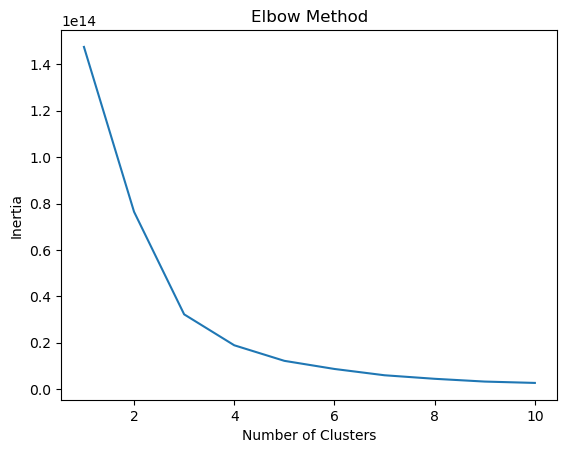

In [54]:
from sklearn.cluster import KMeans

x=rfm[["recency","frequency","monetary"]]
inertia=[]
for i in range(1,11):
    kmean=KMeans(i,random_state=123)
    kmean.fit(x)
    inertia.append(kmean.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


## Trying k value as 3 to find the segments

In [55]:
kmeans = KMeans(n_clusters=3, random_state=124)
kmeans.fit(x)

x['Cluster'] = kmeans.labels_


cluster_means=x.groupby("Cluster").mean()
strategy = {
    0: 'High-value segment - Target with premium offers and personalized services',
    1: 'Medium-value segment - Offer discounts and loyalty rewards to maintain engagement',
    2: 'Low-value segment - Focus on increasing frequency of purchases and upselling'
}

print("Cluster Analysis:")
print(cluster_means)
print("\nStrategy:")
for cluster, description in strategy.items():
    print(f"Cluster {cluster}: {description}")

Cluster Analysis:
            recency    frequency      monetary
Cluster                                       
0        152.246575    65.995165  1.095097e+05
1         71.571429  1488.000000  3.342715e+06
2        101.736364   296.618182  6.040966e+05

Strategy:
Cluster 0: High-value segment - Target with premium offers and personalized services
Cluster 1: Medium-value segment - Offer discounts and loyalty rewards to maintain engagement
Cluster 2: Low-value segment - Focus on increasing frequency of purchases and upselling


## 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

###  4.1 First define dependent variable with categories low value, medium value, high value using customer revenue

In [56]:
x['revenue_category']=pd.qcut(x["monetary"],q=3,labels=["low value","medium value","high value"])
x

,recency,frequency,monetary,Cluster,revenue_category
customerid,,,,,
12346,107,6,1584.2274,0,low value
12347,59,177,903080.8530,2,high value
12348,73,69,93214.6356,0,medium value
12350,17,51,85591.4094,0,medium value
12356,107,108,88958.6286,0,medium value
...,...,...,...,...,...
18259,270,18,31948.3380,0,low value
18260,87,117,145502.6262,0,medium value
18269,194,24,6661.9248,0,low value


### 4.2 Then perform Classification model 

In [57]:
from sklearn.model_selection import train_test_split
X=x[["recency","frequency","monetary"]]
y=x["revenue_category"]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1174, 3), (1174,), (294, 3), (294,))

## LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [59]:
lr=LogisticRegression(random_state=123)
lr.fit(x_train,y_train)

LogisticRegression(random_state=123)

In [60]:
y_pred = lr.predict(x_test)

In [61]:
print(f"Accuracy: {accuracy_score(y_pred,y_test)}")

Accuracy: 0.7278911564625851


In [62]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

  high value       0.64      0.88      0.74        89
   low value       0.92      0.75      0.83       110
medium value       0.65      0.56      0.60        95

    accuracy                           0.73       294
   macro avg       0.74      0.73      0.72       294
weighted avg       0.75      0.73      0.73       294



## RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf=RandomForestClassifier(n_estimators=100,random_state=123)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=123)

In [65]:
y_pred=rf.predict(x_test)
print(f"Accuracy: {accuracy_score(y_pred,y_test)}")

Accuracy: 1.0


In [66]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

  high value       1.00      1.00      1.00        89
   low value       1.00      1.00      1.00       110
medium value       1.00      1.00      1.00        95

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# RandomForestClassifier perform really good in this scenario compare to LogisticRegression

### 5. Cross-Selling (Which products are selling together)


### 5.1  You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

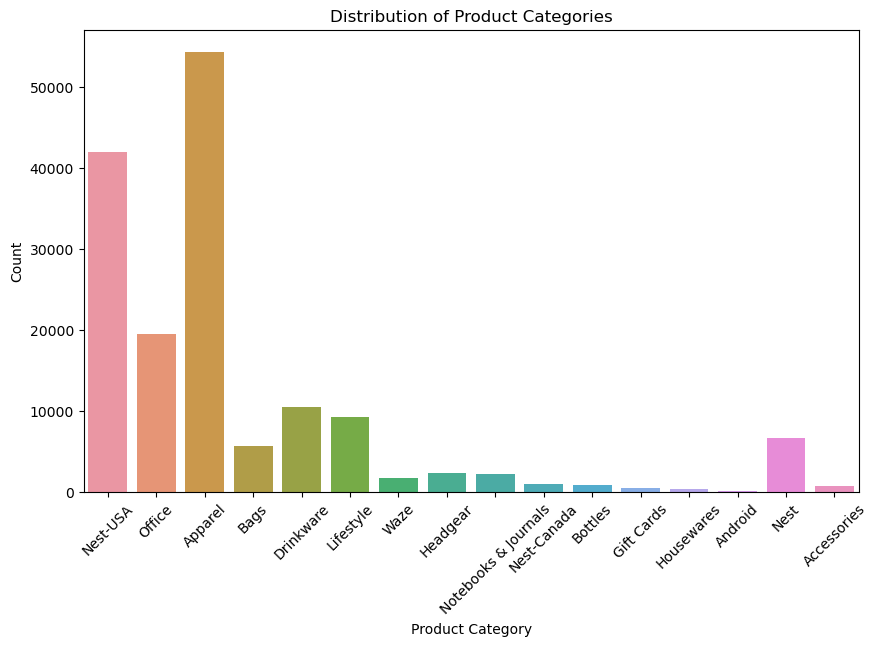

In [67]:
#exploratory analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='product_category')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [68]:
# market basket analysis

basket=final_data.groupby(["transaction_id","product_category"])["quantity"].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apriori algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [69]:
frequent_itemsets=apriori(basket_sets,min_support=0.01, use_colnames=True)
rules=association_rules(frequent_itemsets, metric='lift',min_threshold=1)
print(rules.sort_values(by=["confidence","lift"],ascending=(False,False)))

               antecedents             consequents  antecedent support  \
64       (Bags, Lifestyle)                (Office)             0.01500   
58       (Bags, Drinkware)                (Office)             0.02176   
70  (Drinkware, Lifestyle)                (Office)             0.02592   
4               (Headgear)               (Apparel)             0.02696   
25  (Notebooks & Journals)                (Office)             0.02480   
..                     ...                     ...                 ...   
54               (Apparel)     (Office, Lifestyle)             0.32516   
42               (Apparel)  (Drinkware, Lifestyle)             0.32516   
37               (Apparel)          (Office, Bags)             0.32516   
31               (Apparel)       (Bags, Drinkware)             0.32516   
8                (Apparel)  (Notebooks & Journals)             0.32516   

    consequent support  support  confidence      lift  leverage  conviction  \
64             0.14104  0.01020 

C:\Users\aazar\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [70]:
print(frequent_itemsets)

    support                         itemsets
0   0.32516                        (Apparel)
1   0.06180                           (Bags)
2   0.01032                        (Bottles)
3   0.10096                      (Drinkware)
4   0.02696                       (Headgear)
5   0.06848                      (Lifestyle)
6   0.07896                           (Nest)
7   0.01032                    (Nest-Canada)
8   0.46504                       (Nest-USA)
9   0.02480           (Notebooks & Journals)
10  0.14104                         (Office)
11  0.01768                           (Waze)
12  0.02572                  (Bags, Apparel)
13  0.04512             (Drinkware, Apparel)
14  0.01736              (Headgear, Apparel)
15  0.03316             (Apparel, Lifestyle)
16  0.01464              (Nest-USA, Apparel)
17  0.01064  (Apparel, Notebooks & Journals)
18  0.06228                (Office, Apparel)
19  0.02176                (Bags, Drinkware)
20  0.01500                (Bags, Lifestyle)
21  0.0264

In [71]:
print(rules)

               antecedents             consequents  antecedent support  \
0                   (Bags)               (Apparel)             0.06180   
1                (Apparel)                  (Bags)             0.32516   
2              (Drinkware)               (Apparel)             0.10096   
3                (Apparel)             (Drinkware)             0.32516   
4               (Headgear)               (Apparel)             0.02696   
..                     ...                     ...                 ...   
69     (Office, Lifestyle)             (Drinkware)             0.03520   
70  (Drinkware, Lifestyle)                (Office)             0.02592   
71                (Office)  (Drinkware, Lifestyle)             0.14104   
72             (Drinkware)     (Office, Lifestyle)             0.10096   
73             (Lifestyle)     (Office, Drinkware)             0.06848   

    consequent support  support  confidence      lift  leverage  conviction  \
0              0.32516  0.02572 

## 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days) 

### 6.1 For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer. 

In [72]:
 final_data["next_purchase_day"]=final_data.groupby('customerid')['transaction_date'].diff().dt.days.fillna(0).abs()

In [73]:
def next(x):
    if x <=30:
        return "0-30 days"
    elif x <=60:
        return "30-60 days"
    elif x <=90:
        return "60-90 days"
    else:
        return "90+ days"
final_data["next_purchase_category"]=final_data['next_purchase_day'].apply(next)

In [74]:
# features
X=final_data[["quantity","avg_price","delivery_charges","gst","invoice_value"]]
y=final_data["next_purchase_category"]

# spliting train and test model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((126057, 5), (126057,), (31515, 5), (31515,))

In [75]:
rf=RandomForestClassifier(n_estimators=100,random_state=123)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=123)

In [76]:
y_pred=rf.predict(x_test)
print(f"Accuracy:{accuracy_score(y_pred,y_test)}")

Accuracy:0.9926066952244963


In [77]:
y_test_reset = y_test.reset_index(drop=True)
actual_labels=pd.Series(y_test_reset,name='Actual_Label')
predicted_labels = pd.Series(y_pred, name='Predicted_Label')
predicted_data=pd.concat([x_test.reset_index(drop=True),actual_labels,predicted_labels],axis=1)
predicted_data.head()

,quantity,avg_price,delivery_charges,gst,invoice_value,Actual_Label,Predicted_Label
0,3,119.00,6.0,0.10,3528.3000,0-30 days,0-30 days
1,1,149.00,6.5,0.10,3107.6000,0-30 days,0-30 days
2,2,24.45,6.0,0.18,1667.3580,0-30 days,0-30 days
3,1,4.08,6.0,0.18,133.6176,0-30 days,0-30 days
4,1,16.99,6.5,0.18,173.9338,0-30 days,0-30 days


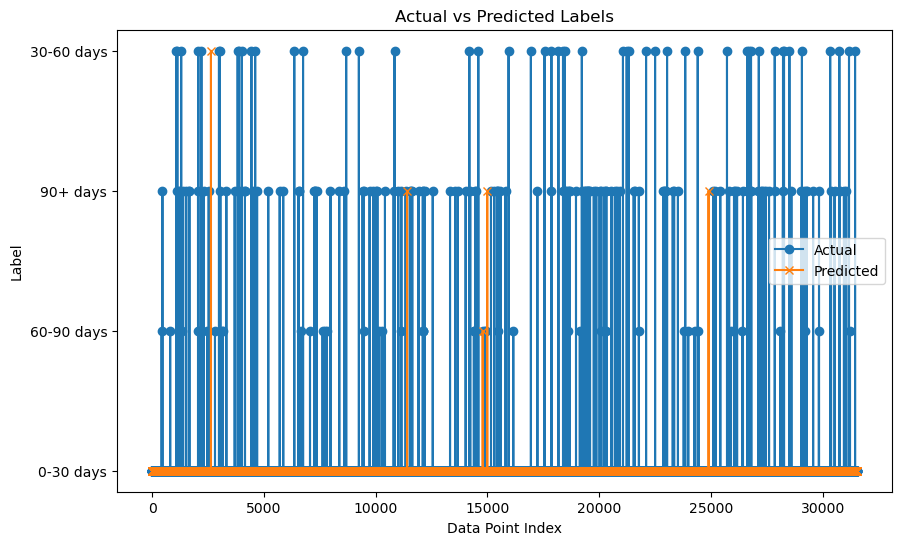

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(predicted_data["Actual_Label"], label='Actual', marker='o')
plt.plot(predicted_data["Predicted_Label"], label='Predicted', marker='x')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Data Point Index')
plt.ylabel('Label')
plt.legend()
plt.show()

In [79]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   0-30 days       1.00      0.99      1.00     31510
  30-60 days       0.00      0.00      0.00         1
  60-90 days       0.00      0.00      0.00         1
    90+ days       0.00      0.00      0.00         3

    accuracy                           0.99     31515
   macro avg       0.25      0.25      0.25     31515
weighted avg       1.00      0.99      1.00     31515



## DecisionTreeClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred_dt=dt.predict(x_test)
acc=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy:{acc}")

Accuracy:0.9921941932413136


In [83]:
y_test_reset = y_test.reset_index(drop=True)
actual_labels=pd.Series(y_test_reset,name='Actual_Label')
predicted_labels = pd.Series(y_pred_dt, name='Predicted_Label')
predicted_data=pd.concat([x_test.reset_index(drop=True),actual_labels,predicted_labels],axis=1)
predicted_data.head()

,quantity,avg_price,delivery_charges,gst,invoice_value,Actual_Label,Predicted_Label
0,3,119.00,6.0,0.10,3528.3000,0-30 days,0-30 days
1,1,149.00,6.5,0.10,3107.6000,0-30 days,0-30 days
2,2,24.45,6.0,0.18,1667.3580,0-30 days,0-30 days
3,1,4.08,6.0,0.18,133.6176,0-30 days,0-30 days
4,1,16.99,6.5,0.18,173.9338,0-30 days,0-30 days


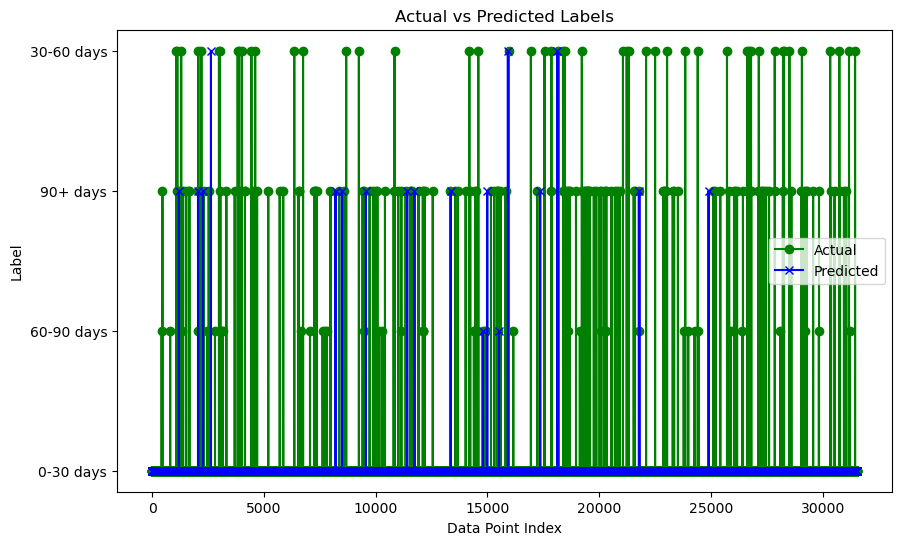

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(predicted_data["Actual_Label"], label='Actual', marker='o',color="green")
plt.plot(predicted_data["Predicted_Label"], label='Predicted', marker='x',color="blue")
plt.title('Actual vs Predicted Labels')
plt.xlabel('Data Point Index')
plt.ylabel('Label')
plt.legend()
plt.show()

In [85]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

   0-30 days       1.00      0.99      1.00     31497
  30-60 days       0.00      0.00      0.00         3
  60-90 days       0.00      0.00      0.00         2
    90+ days       0.00      0.00      0.00        13

    accuracy                           0.99     31515
   macro avg       0.25      0.25      0.25     31515
weighted avg       1.00      0.99      1.00     31515



## Despite both algorithms achieving a high accuracy score of 99%, the Decision Tree model excelled in visualization and prediction accuracy, making it the preferred choice for its clarity and precision in understanding and forecasting customer behavior.

## 7. Perform cohort analysis by defining below cohorts

### 7.1 Customers who started in each month and understand their behaviour

In [86]:
final_data["cohort_month"]=final_data.groupby("customerid")["transaction_date"].transform("min").dt.to_period("M")

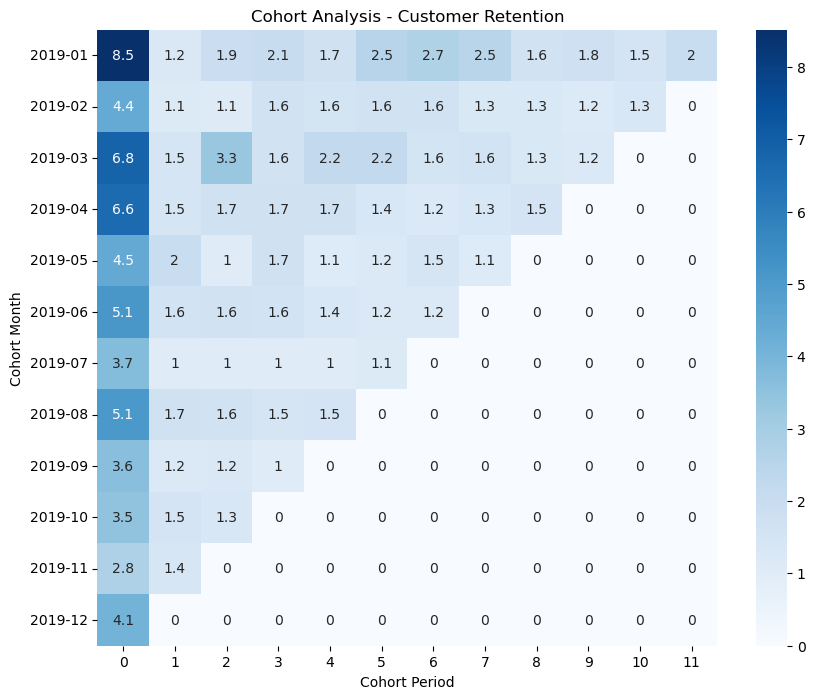

In [87]:
cohort=final_data.groupby(["cohort_month","transaction_date"]).agg(tot_cust=("customerid","nunique"),tot_revenue=("invoice_value","sum")).round(2)
cohort=cohort.reset_index()
cohort['cohort_period'] = (cohort['transaction_date'].dt.to_period('M') - cohort['cohort_month']).apply(lambda x: x.n)

cohort_pivot=cohort.pivot_table(values="tot_cust",index="cohort_month",columns="cohort_period").fillna(0)

plt.figure(figsize=(10, 8))
plt.title('Cohort Analysis - Customer Retention')
sns.heatmap(cohort_pivot, annot=True, cmap='Blues')
plt.xlabel('Cohort Period')
plt.ylabel('Cohort Month')
plt.show()

## 7.2 Which Month cohort has maximum retention?

In [88]:
max_retention_cohort=cohort_pivot.sum(axis=1).idxmax()
max_retention_rate = cohort_pivot.loc[max_retention_cohort].max()
print(f"The cohort month with maximum retention is {max_retention_cohort}, with a retention rate of {max_retention_rate:.2f}")

The cohort month with maximum retention is 2019-01, with a retention rate of 8.52


## Thank You